<div dir=rtl>
    <b style="font-size: 18px">
نام و نام‌خانوادگی: محمدصادق مجیدی یزدی 
    <br/>
    شماره دانشجویی: 98106004
    </b>
</div>

<div dir="rtl" style="text-align:center;font-size:32px"><b>تمرین چهارم بخش عملی (سوال ۶)</b></div>

<div dir="rtl">
    ابتدا کتابخانه‌های موردنیاز را ایمپورت می‌کنیم. از کتابخانه
    sklearn
    صرفا برای جدا کردن داده‌های ترین و تست و همچنین کلاسیفایر درخت تصمیم یا همان
    DecisionTreeClassifier
    به عنوان یک یادگیرنده ضعیف برای اجرای 
    Boosting
    روی آن استفاده می‌کنیم.
</div>

In [647]:
import numpy as np
import pandas as pd 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns               
%matplotlib inline
sns.set()
plt.style.use("ggplot")

import warnings                                            
warnings.filterwarnings('ignore')

<div dir="rtl">
    <b style="font-size: 18px">بخش الف</b>
</div>

<div dir="rtl">
    دیتاست را از فایل داده‌شده لود کرده و ستون اول آن که شناسه است را حذف می‌کنیم. چند سطر اول آن را نمایش می‌دهیم.
</div>

In [648]:
df = pd.read_csv('data.csv')
df.drop(df.columns[[0]], axis=1, inplace=True)
df.head()

,X1,X2,Y
0,0.004291,-0.174600,-1
1,2.225050,0.117181,1
2,0.274173,-0.514910,-1
3,-1.045133,-0.798009,1
4,1.611457,0.239339,1


<div dir="rtl">
    یک بررسی کلی روی دیتاست انجام می‌دهیم. نوع داده ستون‌ها، تعداد داده‌های مربوط به هر یک از لیبل‌های 1 و 1-، تعداد خانه‌های خالی یا
    missing
    و اطلاعات آماری کلی دیتاست را در زیر نشان داده‌ایم.
</div>

In [649]:
print('Dataset data types of columns:')
print(df.dtypes)
print('\nCount of data points per lable:')
print(df[['Y']].apply(lambda x: x.value_counts(dropna=False)).T.stack())
print('\nNumber of missing values in dataset:')
print(df.isna().sum())
print('\nGeneral Info:')
df.describe()

Dataset data types of columns:
X1    float64
X2    float64
Y       int64
dtype: object

Count of data points per lable:
Y  -1    100
    1    100
dtype: int64

Number of missing values in dataset:
X1    0
X2    0
Y     0
dtype: int64

General Info:


,X1,X2,Y
count,200.000000,200.000000,200.000000
mean,0.134422,-0.032272,0.000000
std,0.963356,0.936228,1.002509
min,-2.295103,-2.979597,-1.000000
25%,-0.565908,-0.541366,-1.000000
50%,0.176662,0.028769,0.000000
75%,0.802764,0.570275,1.000000
max,2.679910,2.467651,1.000000


<div dir="rtl">
    نمودار توزیع داده‌های موجود در دیتاست را در صفحه نمایش می‌دهیم. محور افقی مربوط به فیچر اول داده‌ها یعنی
    X1
    و محور عمودی مربوط به فیچر دوم یعنی
    X2
    است. داده‌های مربوط به هر لیبل با یک رنگ یکسان نمایش داده شده‌اند.
    <br>
    نمودار هیت‌مپ در این مسئله Classification اطلاعات زیادی به ما نمی‌دهد.
</div>

<AxesSubplot:title={'center':'Dataset columns correlation heatmap'}>

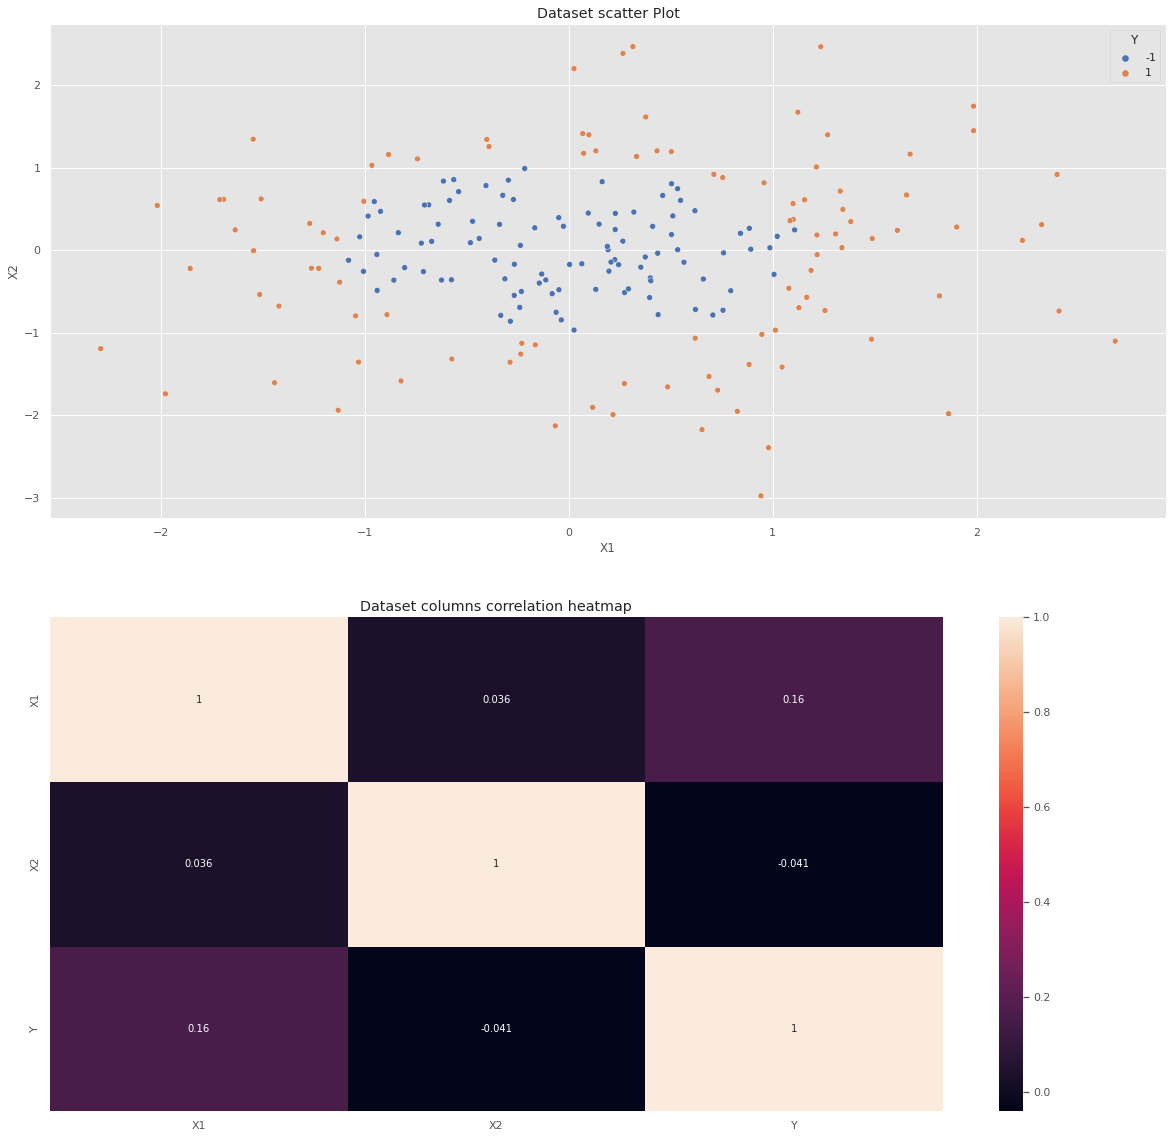

In [650]:
fig, axes = plt.subplots(2, figsize=(20,20))
axes[0].set_title('Dataset scatter Plot')
sns.scatterplot(data=df, x='X1', y='X2', hue='Y', palette='deep', ax=axes[0])
axes[1].set_title('Dataset columns correlation heatmap')
sns.heatmap(df.corr(), annot=True, ax=axes[1])

<div dir="rtl">
    حال داده‌های ترین و تست را با نسبت ۷۵ به ۲۵ درصد و با توزیعی رندوم جداسازی می‌کنیم.
</div>

In [651]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["Y"]), df["Y"], test_size =0.25,shuffle=True)

<div dir="rtl">
    نمودار توزیع داده‌های ترین و تست را به صورت جداگانه در صفحه رسم می‌کنیم.
</div>

<AxesSubplot:title={'center':'Test set scatter Plot'}, xlabel='X1', ylabel='X2'>

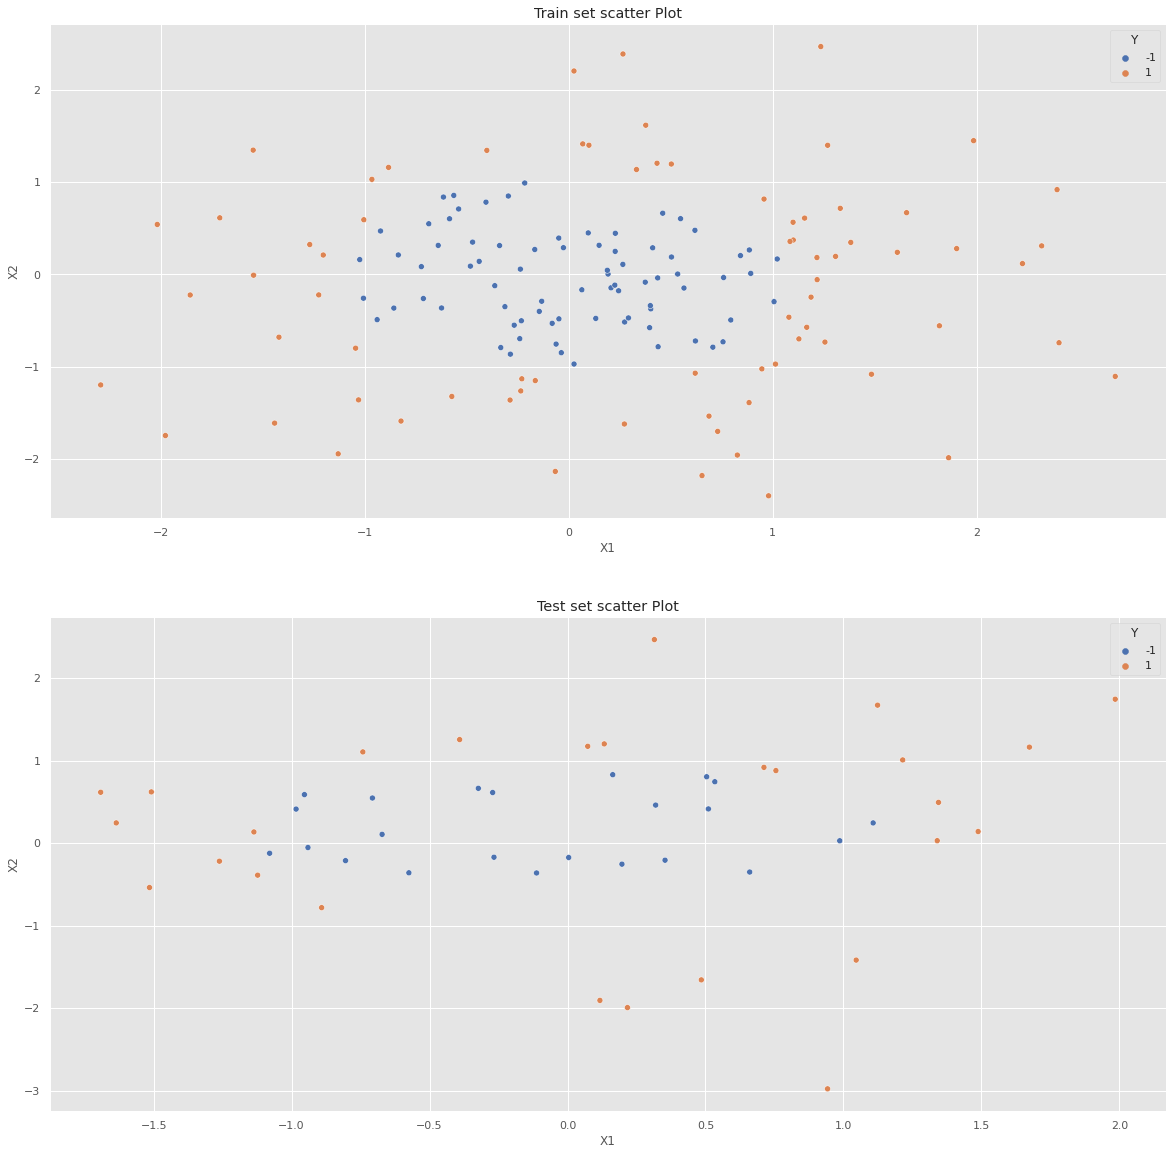

In [652]:
fig1, axes1 = plt.subplots(2, figsize=(20,20))

axes1[0].set_title('Train set scatter Plot')
sns.scatterplot(data=X_train, x='X1', y='X2', hue=y_train, palette='deep', ax=axes1[0])

axes1[1].set_title('Test set scatter Plot')
sns.scatterplot(data=X_test, x='X1', y='X2', hue=y_test, palette='deep', ax=axes1[1])

<div dir="rtl">
    <b style="font-size: 18px">بخش ب</b>
</div>

<div dir="rtl">
    ابتدا مدل Adaboost را دقیقا به همان صورت الگوریتم ذکرشده در سوال ۲ تمرین پیاده‌سازی می‌کنیم.
    از مدل
    DecisionTreeClassifier
    به عنوان یادگیرنده ضعیف یا همان توابع
    h
    استفاده کرده‌ایم. این مدل یک پارامتر T دارد که تعداد یادگیرنده‌های استفاده شده برای انجام فرایند تقویت را تعیین می‌کند. مدل پس از انجام یادگیری توابع فرض را در لیست
    Hs
    و صریب هر تابع را در لیست
    Alphas
    ذخیره می‌کند تا در انجام پیش‌بینی‌ها از آن‌ها استفاده کند. همچنین توابعی را برای محاسبه متریک‌ها در کلاس تعریف کردیم.
    در درخت تصمیم از روش gini impurity و حداکثر عمق 1 استفاده کردیم.
</div>

In [653]:
class AdaBoostClassifier:
    def __init__(self, T, random_state=0):
        self.T = T
        self.random_state = random_state
        self.Hs = list()
        self.Alphas = list()
        
    def fit(self, X, y):
        X['Y'] = y
        m = len(X.index)
        X['weight'] = 1/m
        for i in range(self.T):
            dtc_gini = DecisionTreeClassifier(criterion="gini", random_state=self.random_state, max_depth=1)
            dtc = dtc_gini.fit(X.iloc[0:m,0:2], y, sample_weight=X['weight'])
            y_pred = dtc_gini.predict(X.iloc[0:m,0:2])
            X['pred'] = y_pred
            X.loc[X.Y != X.pred, 'misclassified'] = 1
            X.loc[X.Y == X.pred, 'misclassified'] = 0
            e = sum(X['misclassified'] * X['weight'])
            alpha = 0.5 * np.log((1-e)/e)
            new_weight = X['weight'] * np.exp(-1 * alpha * X['Y'] * X['pred'])
            z = sum(new_weight)
            normalized_weight = new_weight/sum(new_weight)
            X['weight'] = normalized_weight
            self.Hs.append(dtc_gini)
            self.Alphas.append(alpha)
            
    def predict(self, X):
        res = 0
        for i in range(self.T):
            res += self.Alphas[i] * self.Hs[i].predict(X)
        return np.sign(res)
    
    @staticmethod
    def calc_confusion_matrix(pred_y, y):
        return pd.crosstab(y, pred_y).to_numpy()
    
    @staticmethod
    def evaluate_accuracy(pred_y, y):
        conf_matrix = AdaBoostClassifier.calc_confusion_matrix(pred_y, y)
        return (conf_matrix[0][0] + conf_matrix[1][1]) / np.sum(conf_matrix) * 100
    
    @staticmethod
    def evaluate_percision(pred_y, y):
        conf_matrix = AdaBoostClassifier.calc_confusion_matrix(pred_y, y)
        return conf_matrix[1][1] / (conf_matrix[1][1] + conf_matrix[0][1]) * 100
    
    @staticmethod
    def evaluate_recall(pred_y, y):
        conf_matrix = AdaBoostClassifier.calc_confusion_matrix(pred_y, y)
        return conf_matrix[1][1] / (conf_matrix[1][0] + conf_matrix[1][1]) * 100
    
    @staticmethod
    def evaluate_specifity(pred_y, y):
        conf_matrix = AdaBoostClassifier.calc_confusion_matrix(pred_y, y)
        return conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[0][1]) * 100
    
    @staticmethod
    def evaluate_f1_score(pred_y, y):
        recall = AdaBoostClassifier.evaluate_recall(pred_y, y)
        percision = AdaBoostClassifier.evaluate_percision(pred_y, y)
        return 2 * recall * percision / (recall + percision)

<div dir="rtl">
    مدل Adaboost نوشته‌شده را روی مجموعه داده‌های ترین لرن می‌کنیم. از ۱۵ تابع هدف یا یادگیرنده ضعیف به عنوان پارامتر مدل استفاده می‌کنیم.
</div>

In [654]:
model = AdaBoostClassifier(15, 1)
model.fit(X_train, y_train)

<div dir="rtl">
    <b style="font-size: 18px">بخش پ</b>
</div>

<div dir="rtl">
    تمام متریک‌های در دسترس را پس از انجام پیش‌بینی روی داده‌های تست، محاسبه و بررسی می‌کنیم.
    از متریک‌های
    accuarcy, percision, recall, specifity, f1 score
    استفاده کرده‌ایم.
</div>

In [655]:
y_pred = model.predict(X_test)

print('Decision Tree Based AdaBoost Classifier Metrics\n')
print(f'Accuracy:  {AdaBoostClassifier.evaluate_accuracy(y_pred, y_test)}%')
print(f'Percision:  {AdaBoostClassifier.evaluate_percision(y_pred, y_test)}%')
print(f'Recall:  {AdaBoostClassifier.evaluate_recall(y_pred, y_test)}%')
print(f'Specifity:  {AdaBoostClassifier.evaluate_specifity(y_pred, y_test)}%')
print(f'F1 score:  {AdaBoostClassifier.evaluate_f1_score(y_pred, y_test)}%')

Decision Tree Based AdaBoost Classifier Metrics

Accuracy:  90.0%
Percision:  92.3076923076923%
Recall:  88.88888888888889%
Specifity:  91.30434782608695%
F1 score:  90.56603773584906%


<div dir="rtl">
    ماتریس Confusion به دست‌آمده از مقادیر واقعی و مقادیر پیش‌بینی‌شده لیبل داده‌های تست را در زیر مشاهده می‌کنید. محور افقی در ماتریس (ستون‌ها) نشان دهنده مقدار پیش‌بینی‌شده لیبل و محور عمودی (سطرها) نشان‌دهنده مقدار واقعی است.
    <br><br>
    True Negative ------------ False Positive
    <br>
    False Negative ----------- True Positive
</div>

<AxesSubplot:>

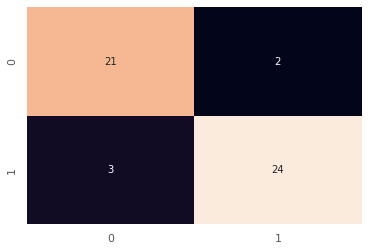

In [656]:
sns.heatmap(AdaBoostClassifier.calc_confusion_matrix(y_pred, y_test), annot=True, cbar=False)

<div dir="rtl">
    یک بار عمل کلاس‌بندی داده‌ها را با استفاده از صرفا یک درخت تصمیم با همان شرایطی که در مدل بالا استفاده شده بود انجام می‌دهیم و روی همان داده‌های ترین عمل لرنینگ را انجام و با همان داده‌های تست پیش‌بینی می‌کنیم. مقادیر متریک را برای این مدل ضعیف محاسبه و ماتریس confusion آن را نمایش می‌دهیم.
</div>

In [657]:
dtc = DecisionTreeClassifier(criterion="gini", random_state=1, max_depth=1)
dtc.fit(X_train.drop(columns=['pred', 'misclassified', 'weight', 'Y']),y_train)
dtc_pred_y = dtc.predict(X_test)

In [658]:
print('Decision Tree Classifier Metrics\n')
print(f'Accuracy:  {AdaBoostClassifier.evaluate_accuracy(dtc_pred_y, y_test)}%')
print(f'Percision:  {AdaBoostClassifier.evaluate_percision(dtc_pred_y, y_test)}%')
print(f'Recall:  {AdaBoostClassifier.evaluate_recall(dtc_pred_y, y_test)}%')
print(f'Specifity:  {AdaBoostClassifier.evaluate_specifity(dtc_pred_y, y_test)}%')
print(f'F1 score:  {AdaBoostClassifier.evaluate_f1_score(dtc_pred_y, y_test)}%')

Decision Tree Classifier Metrics

Accuracy:  60.0%
Percision:  81.81818181818183%
Recall:  33.33333333333333%
Specifity:  91.30434782608695%
F1 score:  47.368421052631575%


<AxesSubplot:>

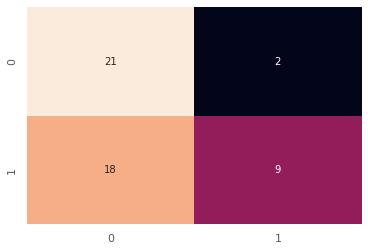

In [659]:
sns.heatmap(AdaBoostClassifier.calc_confusion_matrix(dtc_pred_y, y_test), annot=True, cbar=False)

<div dir="rtl">
    مشاهده می‌کنیم که متریک‌ها در مدل AdaBoost به خصوص متریک F1 score بسیار نسبت به یک کلاس‌بند درخت تصمیم به تنهایی بهتر بوده و مقدار قابل قبول‌تری را نمایش می‌دهد. بنابراین یادگیری تقویتی تاثیر چشمگیری بر بهبود کلاس‌بندی گذاشته و بایاس را کاهش می‌دهد.
</div>